In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.8.0


In [3]:
dataset = pd.read_csv("diabetes.csv")

In [4]:
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
# get numpy ndarray
dataset = dataset.values

In [6]:
type(dataset)

numpy.ndarray

In [7]:
dataset.shape

(767, 9)

In [8]:
# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.25, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [10]:
sc.fit(X_train)
sc.transform(X_train)
sc.fit(X_test)
sc.transform(X_test)

array([[ 0.68289227, -0.76579988, -0.36993244, ...,  0.28785733,
        -0.16235258,  0.96782064],
       [-0.85601989,  0.9779149 ,  0.24388139, ..., -0.92114345,
        -1.09380192, -0.74274608],
       [-0.54823746, -0.470255  , -0.10686937, ..., -0.1727144 ,
        -0.98761063, -1.01283556],
       ...,
       [-0.54823746, -1.2091172 , -0.01918168, ...,  0.02878573,
         0.04092789, -0.92280573],
       [ 1.914022  , -0.26337359, -2.91287543, ...,  0.47496459,
        -1.06042751, -0.29259694],
       [ 0.68289227, -0.02693768,  0.24388139, ...,  0.23028586,
         0.75696061,  0.1575522 ]])

In [11]:
print(X_train.shape)

(431, 8)


## Add more hidden layers

For 1 hidden layer: 6/6 [==============================] - 0s 5ms/step - loss: 0.6075 - acc: 0.7500
<br>For 3 hidden layers: 6/6 [==============================] - 0s 0s/step - loss: 1.0355 - acc: 0.7135

In [12]:
model = keras.Sequential() # create model

# FIX ME
model.add(layers.Dense(32, input_dim=8, activation='relu')) # Input layer

model.add(layers.Dense(64, activation='relu')) # hidden layer1.

model.add(layers.Dense(64, activation='relu')) # hidden layer2.

model.add(layers.Dense(64, activation='relu')) # hidden layer3.

model.add(layers.Dense(1, activation='sigmoid')) # output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,785
Trainable params: 10,785
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train thye model with 100 epochs(no. of batches), 50 data points in each batch and validate with split data.
my_first_nn_fitted = model.fit(X_train, Y_train, epochs=100, batch_size = 50, validation_data=(X_val,Y_val))

Epoch 1/100
9/9 [==============================] - 1s 21ms/step - loss: 2.1695 - acc: 0.4942 - val_loss: 1.6788 - val_acc: 0.6667
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1.0904 - acc: 0.5893 - val_loss: 0.7565 - val_acc: 0.6806
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.8369 - acc: 0.6172 - val_loss: 0.7370 - val_acc: 0.6250
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6805 - acc: 0.6566 - val_loss: 0.6743 - val_acc: 0.6597
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6449 - acc: 0.6497 - val_loss: 0.6777 - val_acc: 0.6389
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6017 - acc: 0.7169 - val_loss: 0.6462 - val_acc: 0.6806
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6100 - acc: 0.6961 - val_loss: 0.6979 - val_acc: 0.6111
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5938 - acc: 0.7030 - va

9/9 [==============================] - 0s 6ms/step - loss: 0.4974 - acc: 0.7610 - val_loss: 0.6328 - val_acc: 0.6597
Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4460 - acc: 0.8121 - val_loss: 0.6859 - val_acc: 0.6458
Epoch 66/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4752 - acc: 0.7703 - val_loss: 0.6742 - val_acc: 0.6319
Epoch 67/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4763 - acc: 0.7796 - val_loss: 0.7283 - val_acc: 0.6458
Epoch 68/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4376 - acc: 0.8005 - val_loss: 0.6125 - val_acc: 0.7222
Epoch 69/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4359 - acc: 0.7773 - val_loss: 0.6442 - val_acc: 0.6806
Epoch 70/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4932 - acc: 0.7657 - val_loss: 0.6592 - val_acc: 0.6736
Epoch 71/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4406 - acc: 0.7935 - val_loss

In [14]:
scores = model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.7163 - acc: 0.7188


In [15]:
print(scores)

[0.7162953019142151, 0.71875]


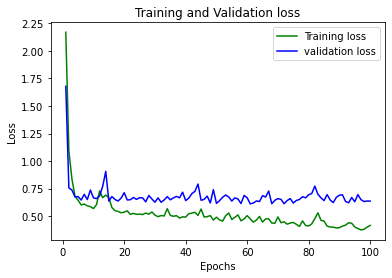

In [16]:
loss_train = my_first_nn_fitted.history['loss'] 
loss_test = my_first_nn_fitted.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss') # Training loss is labled and the graph is shown in green color.
plt.plot(epochs, loss_test, 'b', label='validation loss') # Validation loss is labled and the graph is shown in blue color.
plt.title('Training and Validation loss') # Label the title of the graph.
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() # Display the graph.

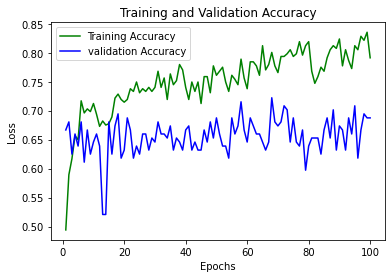

In [18]:
acc_train = my_first_nn_fitted.history['acc']
acc_test = my_first_nn_fitted.history['val_acc']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy') # Training accuracy is labled and the graph is shown in green color.
plt.plot(epochs, acc_test, 'b', label='validation Accuracy') # Validation accuracy is labled and the graph is shown in blue color.
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()